In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [85]:
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

In [86]:
import datetime
import datetime as dt

In [87]:
dataal = pd.read_csv('telkomsel_database.csv')

In [88]:
dataall = dataal
dataall.head()

,tanggal,cluster,Total Recharge B,Total Recharge A,revenue,BAU,ARPU,bulan,RGB
0,2018-01-01,BANYUWANGI,2.933919e+08,2.081157e+08,3.654996e+08,3.652746e+08,3289.773083,1,261904.53568
1,2018-01-01,JEMBER,3.149531e+08,2.021602e+08,3.663345e+08,3.660388e+08,3228.168722,1,287224.58400
2,2018-01-01,PROBOLINGGO,3.072525e+08,2.285973e+08,4.002647e+08,3.998969e+08,3784.776858,1,250806.56384
3,2018-01-01,MADIUN,2.165083e+08,1.325386e+08,2.418391e+08,2.415074e+08,3796.760672,1,173403.40576
4,2018-01-01,PONOROGO,4.238473e+08,3.283753e+08,3.274488e+08,3.270600e+08,3760.291277,1,231624.01248


In [89]:
dataall['tanggal'] = pd.to_datetime(dataall['tanggal'])
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7): 
    dataall[days[i]] = (dataall['tanggal'].dt.dayofweek == i).astype(float)
dataall['day'] = dataall['tanggal'].dt.weekday_name
month = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12): 
    dataall[month[i]] = ((dataall['tanggal'].dt.month)-1 == i).astype(float)
dataall['month'] = dataall['tanggal'].dt.month
dataall['days'] = dataall['tanggal'].dt.day
import calendar
dataall['Month_name'] = dataall['month'].apply(lambda x: calendar.month_abbr[x])
dataall['year'] = dataall['tanggal'].dt.year


import datetime
def week_of_month(tgtdate):
    tgtdate = tgtdate.to_pydatetime()

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we canuse the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 1

dataall['calendar_wom'] = dataall['tanggal'].apply(week_of_month)
week_of_month = ['w1','w2','w3','w4','w5']
for i in range(5): 
    dataall[week_of_month[i]] = (dataall['calendar_wom'] == i).astype(float)

In [90]:
dataall['tanggal'] = pd.to_datetime(dataall.tanggal , format = '%d/%m/%Y')
data1 = dataall
data1.index = dataall.tanggal

In [91]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [92]:
data1['BAU'].fillna(data1['BAU'].median(), inplace = True)
data1['ARPU'].fillna(data1['ARPU'].median(), inplace = True)

In [93]:
data1.head()

,tanggal,cluster,Total Recharge B,Total Recharge A,revenue,BAU,ARPU,bulan,RGB,Mon,...,month,days,Month_name,year,calendar_wom,w1,w2,w3,w4,w5
tanggal,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2018-01-01,BANYUWANGI,2.933919e+08,2.081157e+08,3.654996e+08,3.652746e+08,3289.773083,1,261904.53568,1.0,...,1,1,Jan,2018,1,0.0,1.0,0.0,0.0,0.0
2018-01-01,2018-01-01,JEMBER,3.149531e+08,2.021602e+08,3.663345e+08,3.660388e+08,3228.168722,1,287224.58400,1.0,...,1,1,Jan,2018,1,0.0,1.0,0.0,0.0,0.0
2018-01-01,2018-01-01,PROBOLINGGO,3.072525e+08,2.285973e+08,4.002647e+08,3.998969e+08,3784.776858,1,250806.56384,1.0,...,1,1,Jan,2018,1,0.0,1.0,0.0,0.0,0.0
2018-01-01,2018-01-01,MADIUN,2.165083e+08,1.325386e+08,2.418391e+08,2.415074e+08,3796.760672,1,173403.40576,1.0,...,1,1,Jan,2018,1,0.0,1.0,0.0,0.0,0.0
2018-01-01,2018-01-01,PONOROGO,4.238473e+08,3.283753e+08,3.274488e+08,3.270600e+08,3760.291277,1,231624.01248,1.0,...,1,1,Jan,2018,1,0.0,1.0,0.0,0.0,0.0


In [94]:
column_names = ['cluster','Total Recharge B','Total Recharge A','ARPU','RGB','w5','month']
datacluster = data1
#datacluster = data1.loc[data1['cluster'] == 'SIDOARJO']
x = datacluster[column_names]
xx = pd.get_dummies(x)
y = datacluster['BAU']

In [95]:
xx.head()

,Total Recharge B,Total Recharge A,ARPU,RGB,w5,month,cluster_BANYUWANGI,cluster_GRESIK,cluster_JEMBER,cluster_KEDIRI,cluster_MADIUN,cluster_MADURA,cluster_MALANG,cluster_MOJOKERTO,cluster_PONOROGO,cluster_PROBOLINGGO,cluster_SIDOARJO,cluster_SURABAYA,cluster_TUBAN,cluster_TULUNGAGUNG
tanggal,,,,,,,,,,,,,,,,,,,,
2018-01-01,2.933919e+08,2.081157e+08,3289.773083,261904.53568,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-01-01,3.149531e+08,2.021602e+08,3228.168722,287224.58400,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2018-01-01,3.072525e+08,2.285973e+08,3784.776858,250806.56384,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2018-01-01,2.165083e+08,1.325386e+08,3796.760672,173403.40576,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2018-01-01,4.238473e+08,3.283753e+08,3760.291277,231624.01248,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [96]:
print('Train columns with null values:\n', xx.isnull().sum())

Train columns with null values:
 Total Recharge B       0
Total Recharge A       0
ARPU                   0
RGB                    0
w5                     0
month                  0
cluster_BANYUWANGI     0
cluster_GRESIK         0
cluster_JEMBER         0
cluster_KEDIRI         0
cluster_MADIUN         0
cluster_MADURA         0
cluster_MALANG         0
cluster_MOJOKERTO      0
cluster_PONOROGO       0
cluster_PROBOLINGGO    0
cluster_SIDOARJO       0
cluster_SURABAYA       0
cluster_TUBAN          0
cluster_TULUNGAGUNG    0
dtype: int64


In [108]:
from time import time

X_train = xx[:int(0.8*(len(xx)))]
X_test = xx[int(0.8*(len(xx))):]
y_train = y[:int(0.8*(len(y)))]
y_test = y[int(0.8*(len(y))):]

benchmark_model = ExtraTreesRegressor(random_state = 1)
start = time()

benchmark_model.fit(X_train, y_train)
end = time()

print("Classifier fitted in {:.3f} seconds".format(end-start))

# Load the test dataset

# Print scores on both
print("Score on training data : {:.3f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on testing data : {:.3f}%".format(benchmark_model.score(X_test, y_test) * 100))
print("Score on testing data : {:.3f}".format((mean_absolute_error(y_test, benchmark_model.predict(X_test)))))
bench = benchmark_model.predict(X_test)
a = (mean_absolute_error(y_test, benchmark_model.predict(X_test)))

Classifier fitted in 0.104 seconds
Score on training data : 100.000%
Score on testing data : 94.664%
Score on testing data : 556301575.192


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [109]:
benchmark_model

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=1, verbose=0, warm_start=False)

In [110]:
benchtrain = benchmark_model.predict(X_train)
outputtrain = pd.DataFrame({ 'Index': y_train.index,'Act': y_train, 'Pred': benchtrain})
outputtrain.index = pd.to_datetime(outputtrain.Index , format = '%Y/%m/%d')
outputtrain.head()

,Index,Act,Pred
Index,,,
2018-01-01,2018-01-01,3.652746e+08,3.652746e+08
2018-01-01,2018-01-01,3.660388e+08,3.660388e+08
2018-01-01,2018-01-01,3.998969e+08,3.998969e+08
2018-01-01,2018-01-01,2.415074e+08,2.415074e+08
2018-01-01,2018-01-01,3.270600e+08,3.270600e+08


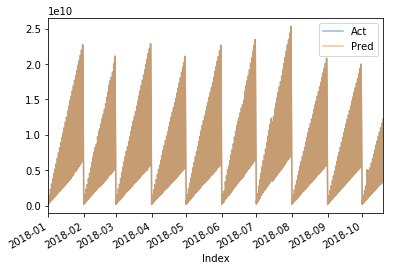

In [111]:
outputtrain[['Act',"Pred"]].plot(alpha=0.5);

In [112]:
X_test

,Total Recharge B,Total Recharge A,ARPU,RGB,w5,month,cluster_BANYUWANGI,cluster_GRESIK,cluster_JEMBER,cluster_KEDIRI,cluster_MADIUN,cluster_MADURA,cluster_MALANG,cluster_MOJOKERTO,cluster_PONOROGO,cluster_PROBOLINGGO,cluster_SIDOARJO,cluster_SURABAYA,cluster_TUBAN,cluster_TULUNGAGUNG
tanggal,,,,,,,,,,,,,,,,,,,,
2018-10-20,3.877256e+08,2.676850e+08,7860.754284,232575.15328,0.0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-10-20,3.759901e+08,2.059723e+08,6856.849706,285619.95904,0.0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2018-10-20,2.953683e+08,1.698275e+08,6611.365571,222211.11968,0.0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2018-10-20,2.791487e+08,1.721269e+08,7805.048231,153484.80512,0.0,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2018-10-20,3.537479e+08,2.153929e+08,7447.391007,215938.04704,0.0,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2018-10-20,4.567570e+08,3.584940e+08,7847.245507,217726.80160,0.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-10-20,6.472636e+08,2.675326e+08,8945.830517,314575.68736,0.0,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2018-10-20,3.666755e+08,2.113611e+08,9347.894966,160987.20672,0.0,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2018-10-20,2.034899e+08,8.797900e+07,9869.302899,96770.30816,0.0,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
benchtest = benchmark_model.predict(X_test)
outputtest = pd.DataFrame({ 'Index': y_test.index,'cluster': X_test.cluster_BANYUWANGI ,'Act': y_test, 'Pred': benchtest})
outputtest.index = pd.to_datetime(outputtest.Index , format = '%Y/%m/%d')
outputtest.head()

,Index,cluster,Act,Pred
Index,,,,
2018-10-20,2018-10-20,1,7.041681e+09,6.797911e+09
2018-10-20,2018-10-20,0,7.127258e+09,7.175789e+09
2018-10-20,2018-10-20,0,5.610296e+09,5.611022e+09
2018-10-20,2018-10-20,0,4.543985e+09,4.526477e+09
2018-10-20,2018-10-20,0,6.054534e+09,6.063676e+09


In [114]:
outputtes2 = outputtest.loc[outputtest['cluster'] == 1]

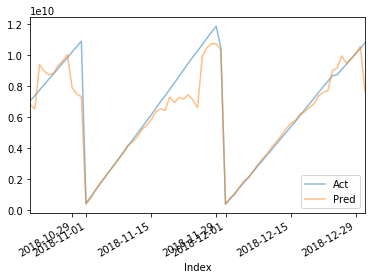

In [115]:
outputtes2[['Act',"Pred"]].plot(alpha=0.5);

In [116]:
submit = outputtest[['Act',"Pred"]]
submit.to_csv("1704-2.csv", index=False)

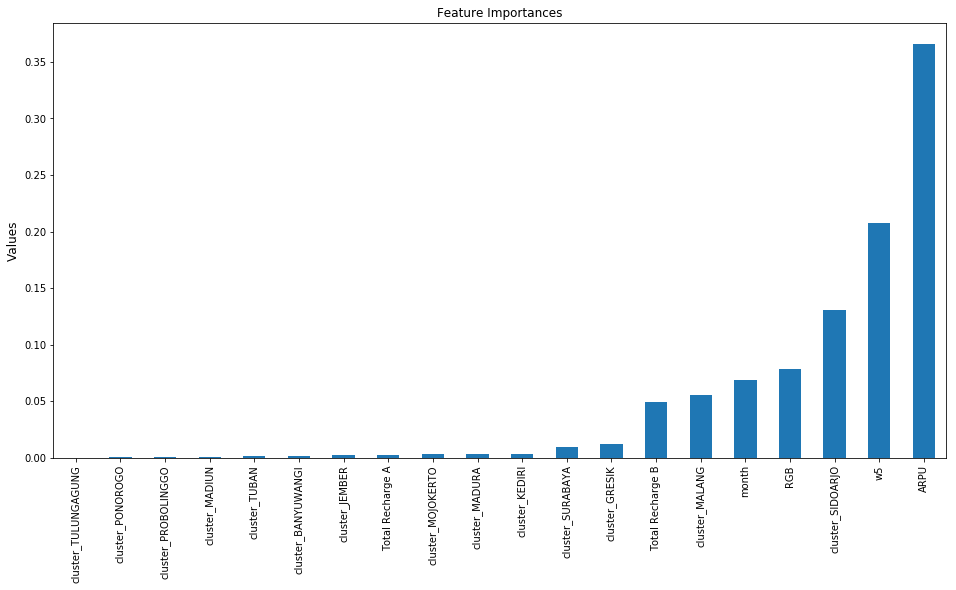

In [117]:
feature_indices = np.argsort(benchmark_model.feature_importances_)
fi = pd.DataFrame(index=xx.columns[feature_indices], data=np.sort(benchmark_model.feature_importances_))

ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

In [118]:
lassocv = LassoCV(eps=1e-7) 
ridge = Ridge(alpha=1e-6) 
lassolarscv = LassoLarsCV()
elasticnetcv = ElasticNetCV(eps=1e-15)
extratree= ExtraTreesRegressor()
randomforest = RandomForestRegressor()
adaboost = AdaBoostRegressor()
gradientboosting = GradientBoostingRegressor()

In [119]:
def RMSE(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs, verbose = 0)
    return (np.sqrt(-cv_results)).mean()

In [120]:
RMSE(lassocv, xx, y)

3100152155.153906

In [121]:
def MAE(estimator,X_train, Y_train, cv=10,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_absolute_error",n_jobs=n_jobs, verbose = 0)
    return ((-cv_results)).mean()

In [122]:
print("Score on extratree    : {:.3f}".format(MAE(extratree, xx, y)))
print("Score on random forest: {:.3f}".format(MAE(randomforest, xx, y)))
print("Score on adaboos      : {:.3f}".format(MAE(adaboost, xx, y)))
print("Score on gradient boos: {:.3f}".format(MAE(gradientboosting, xx, y)))

Score on extratree    : 686744792.426
Score on random forest: 707754214.755
Score on adaboos      : 1712811412.056
Score on gradient boos: 847851242.292


In [123]:
et = extratree.fit(xx,y)
rf = randomforest.fit(xx,y)
ab = adaboost.fit(xx,y)
gb = gradientboosting.fit(xx,y)

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [124]:
features = xx.columns

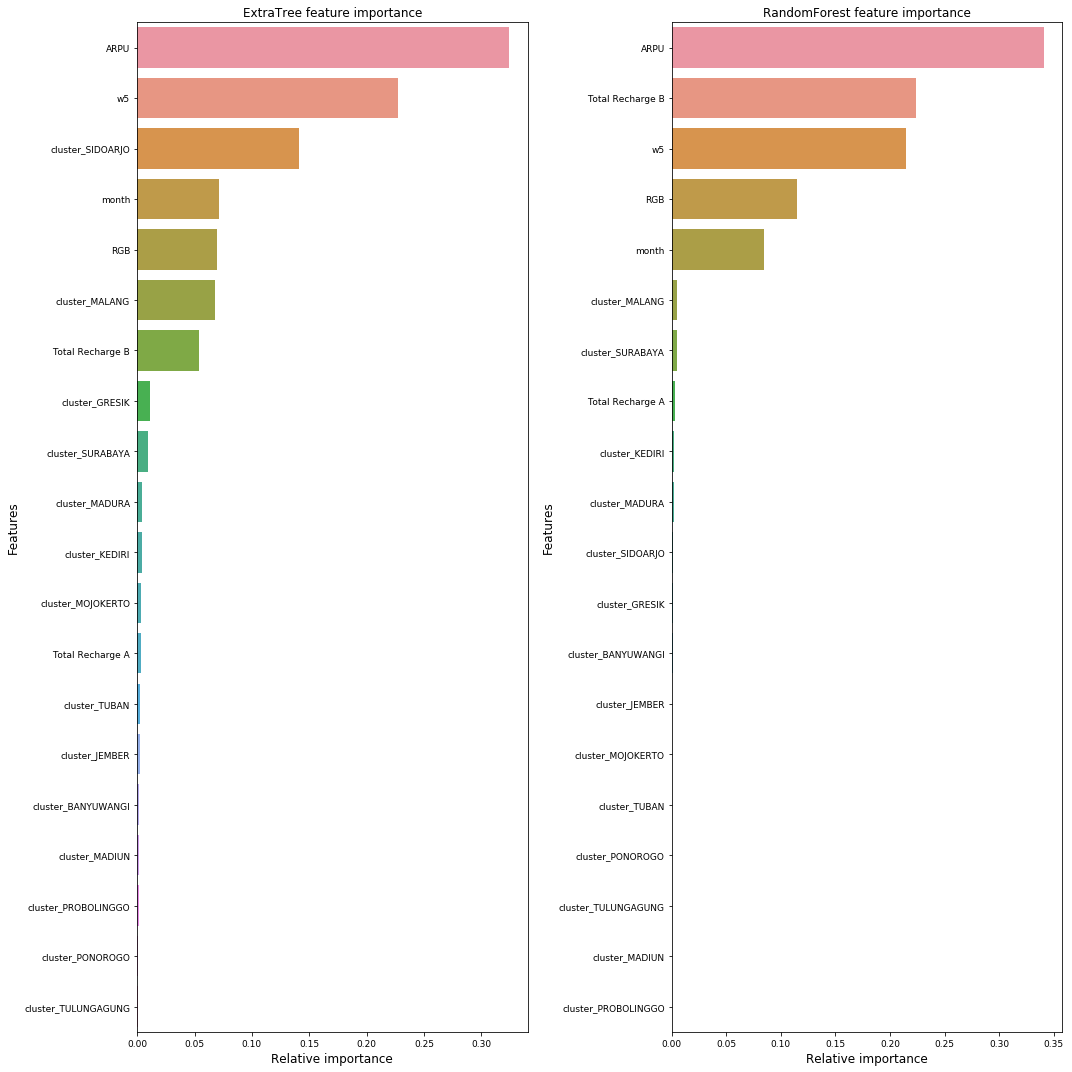

<Figure size 432x288 with 0 Axes>

In [125]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15,15))

names_regressors = [("ExtraTree",et),("RandomForest",rf)]

nregressors = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_regressors[nregressors][0]
        regressor = names_regressors[nregressors][1]
        indices = np.argsort(regressor.feature_importances_)[::-1][:40]
        g = sns.barplot(y=features[indices][:40],x = regressor.feature_importances_[indices][:40] , orient='h',ax=axes[nregressors])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nregressors += 1

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [128]:
print("Score on testing data : {:.3f}%".format(benchmark_model.score(X_test, y_test) * 100))

Score on testing data : 94.664%


In [129]:
import pickle
pickle.dump(benchmark_model, open('model_baru.pkl', 'wb'))